In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv("cardio_train.csv")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
#Data Preprocessing to remove outliers and misrepresented data
filtered_data = data[(data['ap_hi'] >= 90) & (data['ap_hi'] <= 180) &
                      (data['ap_lo'] >= 60) & (data['ap_lo'] <= 120)]
data["age"]=data["age"]//365

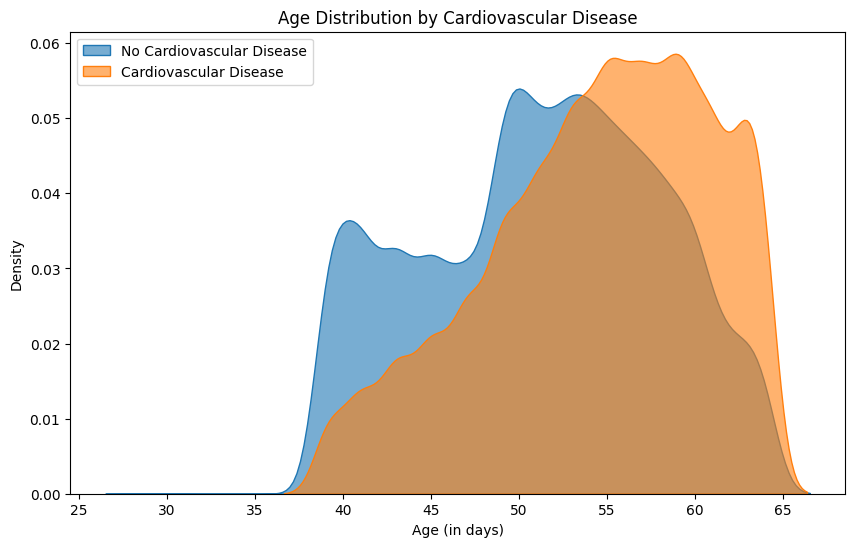

In [4]:
# Age distribution of Cardiovascular Diseases
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['cardio'] == 0]['age'], label='No Cardiovascular Disease', fill=True, alpha=0.6)
sns.kdeplot(data[data['cardio'] == 1]['age'], label='Cardiovascular Disease', fill=True, alpha=0.6)
plt.title('Age Distribution by Cardiovascular Disease')
plt.xlabel('Age (in days)')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

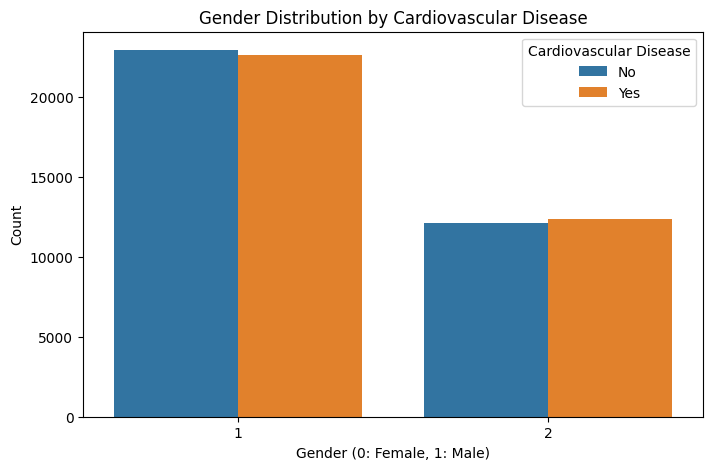

In [5]:
# Gender distribution For Cardiovascular Diseases
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='cardio', data=data)
plt.title('Gender Distribution by Cardiovascular Disease')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='Cardiovascular Disease', labels=['No', 'Yes'])
plt.show()

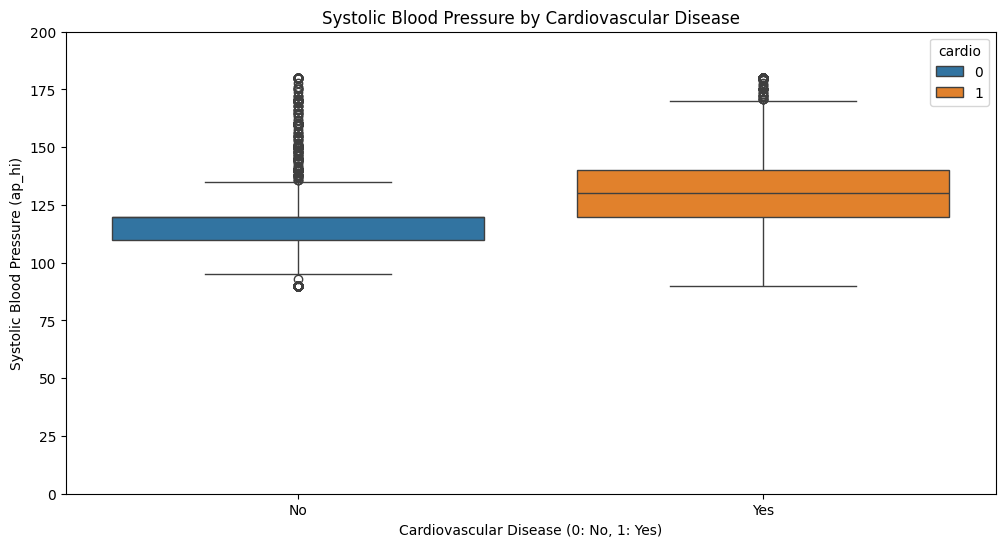

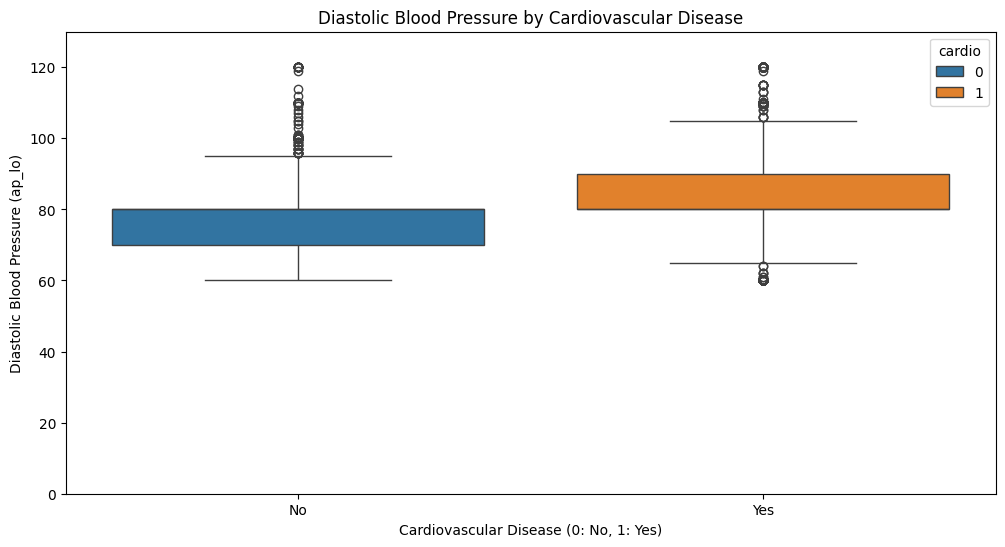

In [6]:
#Box Plots to show correlation between cardiovascular disease and systolic and diastolic blood pressure
plt.figure(figsize=(12, 6))
sns.boxplot(x='cardio', y='ap_hi', data=filtered_data, hue='cardio')
plt.title('Systolic Blood Pressure by Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
plt.ylabel('Systolic Blood Pressure (ap_hi)')
plt.ylim(0, 200)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='cardio', y='ap_lo', data=filtered_data, hue='cardio')
plt.title('Diastolic Blood Pressure by Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
plt.ylabel('Diastolic Blood Pressure (ap_lo)')
plt.ylim(0, 130)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

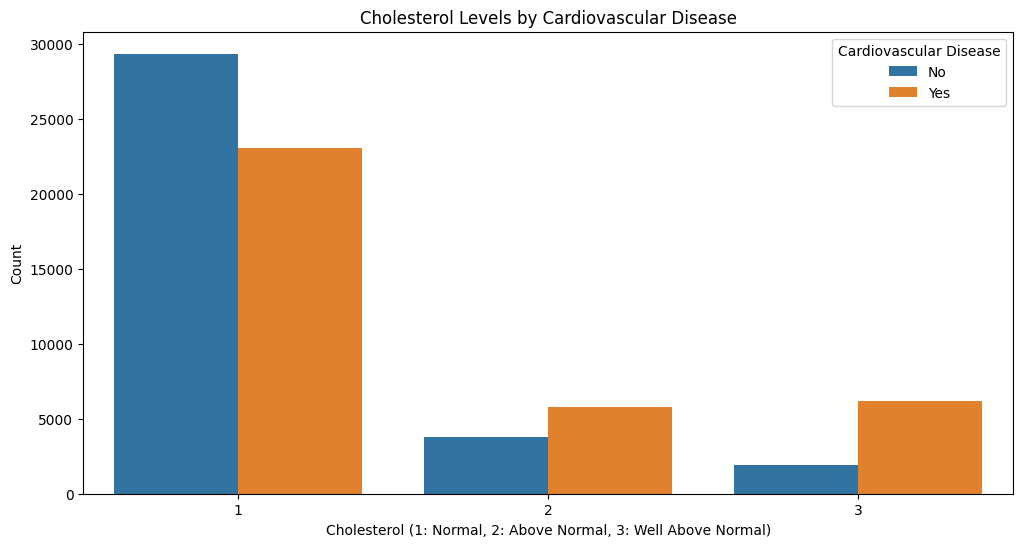

In [7]:
#Plot to show correlation between Cholesterol and cardiovascular disease
plt.figure(figsize=(12, 6))
sns.countplot(x='cholesterol', hue='cardio', data=data)
plt.title('Cholesterol Levels by Cardiovascular Disease')
plt.xlabel('Cholesterol (1: Normal, 2: Above Normal, 3: Well Above Normal)')
plt.ylabel('Count')
plt.legend(title='Cardiovascular Disease', labels=['No', 'Yes'])
plt.show()

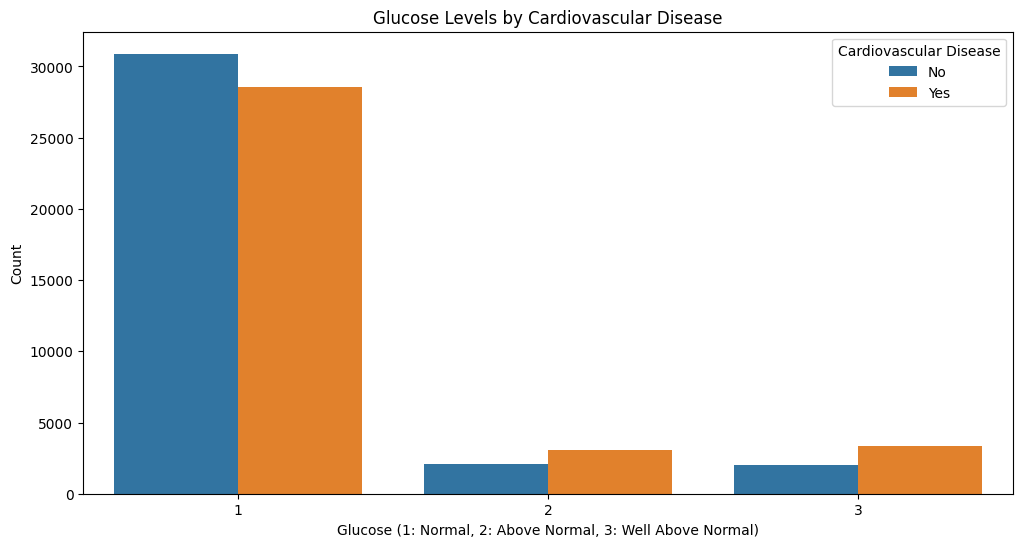

In [8]:
#Plot to show correlation between Glucose levels and cardiovascular disease
plt.figure(figsize=(12, 6))
sns.countplot(x='gluc', hue='cardio', data=data)
plt.title('Glucose Levels by Cardiovascular Disease')
plt.xlabel('Glucose (1: Normal, 2: Above Normal, 3: Well Above Normal)')
plt.ylabel('Count')
plt.legend(title='Cardiovascular Disease', labels=['No', 'Yes'])
plt.show()

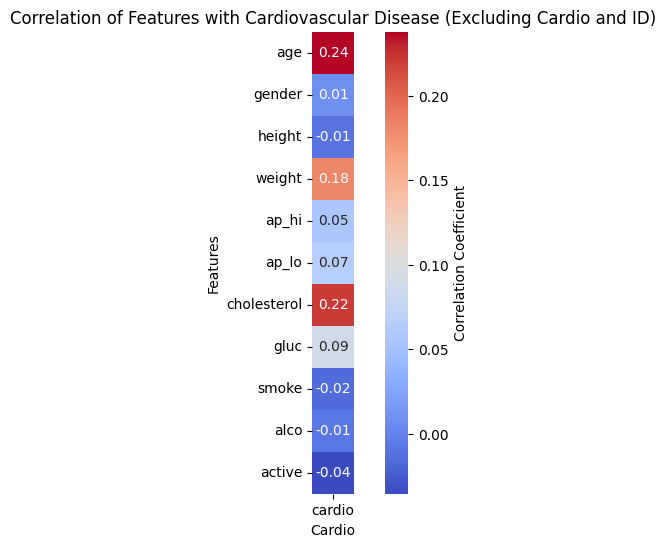

In [9]:
# Correlation Matrix between the features and cardiovascular disease
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr()
cardio_correlation = correlation_matrix[['cardio']].drop(index=['cardio', 'id']) # Changed from columns to index
sns.heatmap(cardio_correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'label': 'Correlation Coefficient'}) # Removed [['cardio']] as it's already selected
plt.title('Correlation of Features with Cardiovascular Disease (Excluding Cardio and ID)')
plt.ylabel('Features')
plt.xlabel('Cardio')
plt.show()

In [10]:
#Finding out accuracy levels of SVM,KNN,DT,LR, and RF models
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [11]:
x=data.drop(["cardio","id"],axis=1)
y=data["cardio"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

In [12]:
#SVM
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_dt}")

SVM Accuracy: 0.7228571428571429


In [13]:
#KNN
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

KNN Accuracy: 0.6846428571428571


In [14]:
#DT
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train.values.ravel())
y_pred_dt = dt_model.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"DT Accuracy: {accuracy_dt}")

DT Accuracy: 0.6377142857142857


In [15]:
#LR
lr_model = LogisticRegression(max_iter=50000)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"LR Accuracy: {accuracy_lr}")

LR Accuracy: 0.7231428571428572


In [16]:
#RF
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"RF Accuracy: {accuracy_rf}")

RF Accuracy: 0.7057142857142857


In [17]:
#Therefore SVM or LR is the most accurate model

In [18]:
feature_columns = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
target_column = 'cardio'
X = data[feature_columns]
y = data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = SVC()
model.fit(X_train, y_train)
accuracy = accuracy_score(y_test, model.predict(X_test))
print("Model accuracy on the test set:", accuracy)

Model accuracy on the test set: 0.7322857142857143


In [22]:
model2= LogisticRegression(max_iter=50000)
model2.fit(X_train, y_train)
accuracy = accuracy_score(y_test, model2.predict(X_test))
print("Model accuracy on the test set:", accuracy)

Model accuracy on the test set: 0.7227142857142858


In [19]:
def predict_svc(input_data, model, scaler):
    feature_columns = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
    input_values = pd.DataFrame([input_data])
    input_values = input_values[feature_columns]
    input_values = scaler.transform(input_values)
    prediction = model.predict(input_values)[0]
    if prediction == 1:
        result = "Patient has cardiovascular issues"
    else:
        result = "Patient doesn't have cardiovascular issues"
    return result

In [20]:
input_data = {
    'age': input("Enter the age:"),
    'gender': input("Enter the gender(1 for male,2 for female):"),
    'height': input("Enter the height(in cm):"),
    'weight': input("Enter the weight(in kg):"),
    'ap_hi': input("Enter the systolic blood pressure:"),
    'ap_lo': input("Enter the diastolic blood pressure:"),
    'cholesterol': input("Enter the cholesterol level(1,2 or 3):"),
    'gluc': input("Enter the glucose level(1,2 or 3):"),
    'smoke': input("Enter smoking status(1 or 0):"),
    'alco': input("Enter drinking status(1 or 0):"),
    'active': input("Enter the activity level(1 or 0):")
}
prediction = predict_svc(input_data, model, scaler)
print(prediction)

Enter the age:17
Enter the gender(1 for male,2 for female):2
Enter the height(in cm):190
Enter the weight(in kg):62
Enter the systolic blood pressure:80
Enter the diastolic blood pressure:60
Enter the cholesterol level(1,2 or 3):1
Enter the glucose level(1,2 or 3):1
Enter smoking status(1 or 0):0
Enter drinking status(1 or 0):0
Enter the activity level(1 or 0):1
Patient doesn't have cardiovascular issues
